# Google store data
## Intro
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) , [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

I also used the analysis method from [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and [How to get "High" Rating on Play Store](https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store).

I will use these three datasets to understand how rating is affacted in Google Play market (and iOS app store)

pd represents Dataset from [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps)

df represents Dataset from [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)

ad represents Dataset from [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(25,15)})
plt.style.use('ggplot')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [6]:
gd = pd.read_csv('https://tufts.box.com/shared/static/8utsdmfx97s0o1j63l1ogwr3822coo6l.csv')
df = pd.read_csv('https://tufts.box.com/shared/static/alsoyenvkbs5kuuyjkpjslk8x6iou6up.csv')
ad = pd.read_csv('https://tufts.box.com/shared/static/apy20t1jghwu4vxho9p3mar23vmgfw67.csv')

I inputed two different datasets on Google Play app and one dataset on iOS app store

In [7]:
#print(gd.dtypes)
gd.drop_duplicates(subset='App', inplace=True)
gd = gd[gd['Android Ver'] !=np.nan]
gd = gd[gd['Android Ver'] !='NAN']
gd = gd[gd['Installs'] != 'Free']
gd = gd[gd['Installs'] != 'Paid']
df = df[df['fileSize'] != '']

In [8]:
print('Number of apps in the first dataset : ' , len(gd))
gd.sample(7)

Number of apps in the first dataset :  9659


App          Category  Rating Reviews  \
3167  Find Dining Restaurant Finder  TRAVEL_AND_LOCAL     4.1     427   
5072                AF Johannesburg            FAMILY     NaN       3   
4204                          MJX H            FAMILY     3.7     126   
3465              Microsoft OneNote      PRODUCTIVITY     4.4  480643   
7786        DCUO|CR Calculator Lite             TOOLS     4.0     182   
3266            Google Korean Input             TOOLS     3.5   74819   
3601             Baby Name Together         PARENTING     4.0     464   

                    Size      Installs  Type Price Content Rating  \
3167                 26M      100,000+  Free     0       Everyone   
5072                 11M          100+  Free     0       Everyone   
4204                 13M       10,000+  Free     0       Everyone   
3465  Varies with device  100,000,000+  Free     0       Everyone   
7786                1.7M       10,000+  Free     0       Everyone   
3266  Varies with device  100,000,000+  Free     0       Everyone   
3601                 24M      100,000+  Free     0       Everyone   

              Genres     Last Updated         Current Ver Android Ver  
3167  Travel & Local   March 21, 2016               1.2.1  4.1 and up  
5072       Education      May 2, 2017               1.0.3  4.1 and up  
4204   Entertainment  August 22, 2017   1.0-build20170819  4.1 and up  
3465    Productivity    July 22, 2018    16.0.10325.20024  4.4 and up  
7786           Tools  August 14, 2017                 3.3  3.0 and up  
3266           Tools    June 25, 2018  Varies with device  7.1 and up  
3601       Parenting   August 6, 2018               2.3.1  5.0 and up

In [9]:
print('Number of apps in the second dataset : ' , len(df))
df.sample(7)

Number of apps in the second dataset :  9264


name       datePublished  numDownloadsMin  \
6387  KPSS YGS ATATÜRK KRONOLOJ?S?       28. Juli 2014             1000   
8697            Yellow Cab Arizona       24. Juli 2014             1000   
2656  Zuma Legende - Marble Legend       23. Juli 2014         10000000   
4534              Deine Rechte U18     9. Oktober 2013             1000   
7309                          ????      2. Januar 2014               10   
5814      StrongVPN OpenVPN Client     12. August 2014            50000   
5505                    Wörterbuch  17. September 2014          5000000   

     fileSize                    packageName  price  aggregateRating  \
6387     721k                     com.tc.ata    0.0         3.789474   
8697      16M      com.apcurium.MK.AAAYellow    0.0         3.312500   
2656      17M      com.easygame.marblelegend    0.0         3.976714   
4534     2.7M  com.cygnet.DeineRechteU18lite    0.0         4.473684   
7309      NaN                 com.lexun.kkou    0.0         4.333333   
5814      10M                  com.strongvpn    0.0         3.898844   
5505      NaN       com.tfd.mobile.TfdSearch    0.0         4.445405   

     softwareVersion  ratingCount   dateCrawled  \
6387             1.8           19  10/5/14 0:00   
8697          1.5.27           16  10/5/14 0:00   
2656         2.3.013       192818  10/5/14 0:00   
4534         1.8.0.0           38  10/5/14 0:00   
7309             NaN            3  10/5/14 0:00   
5814           1.1.9         1038  10/5/14 0:00   
5505             NaN       192930  10/5/14 0:00   

                                                    url  
6387  https://play.google.com/store/apps/details?id=...  
8697  https://play.google.com/store/apps/details?id=...  
2656  https://play.google.com/store/apps/details?id=...  
4534  https://play.google.com/store/apps/details?id=...  
7309  https://play.google.com/store/apps/details?id=...  
5814  https://play.google.com/store/apps/details?id=...  
5505  https://play.google.com/store/apps/details?id=...

In [10]:
print('Number of apps in the third dataset : ' , len(ad))
ad.sample(7)

Number of apps in the third dataset :  7197


Unnamed: 0          id                     track_name  size_bytes  \
2563        3036   848276233       The Easter Bunny Tracker    17702912   
5626        7625  1090871721               Farming PRO 2016   340319232   
3963        4898  1011396240        WSwitch for Belkin WeMo     4703232   
2473        2912   815218412                 Vocabulary.com     8671232   
4164        5192  1027230451             Magic Rush: Heroes   129245184   
477          544   382617920  Viber Messenger – Text & Call   129657856   
6621        9740  1138121520            Skylanders™ Creator   794261504   

     currency  price  rating_count_tot  rating_count_ver  user_rating  \
2563      USD   1.99                38                 9          2.5   
5626      USD   4.99               133                54          4.0   
3963      USD   1.99               138                82          2.5   
2473      USD   2.99              1718              1650          4.5   
4164      USD   0.00              3046                 1          4.5   
477       USD   0.00            164249               206          4.5   
6621      USD   0.00               475               130          4.0   

      user_rating_ver      ver cont_rating        prime_genre  \
2563              1.5      2.0          4+      Entertainment   
5626              4.0      1.6          4+              Games   
3963              2.0      1.3          4+          Utilities   
2473              4.5    1.0.1          9+          Education   
4164              5.0  1.1.122         12+              Games   
477               4.5    6.9.0          4+  Social Networking   
6621              3.5      1.2          9+              Games   

      sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
2563               37                2         1        1  
5626               37                5         1        1  
3963               37                5         1        1  
2473               40                5         1        1  
4164               40                5        13        1  
477                37                5        32        1  
6621               37                5         1        1

## Data Cleaning
###  First dataset(gd)
1. Convert all size to MB (KB devided by 10^3) and remove "M" and "K" to make it an number
2. Remove "+" of installs and make it int
3. Remove "$" of Price and make it float
4. Change Type "Paid" and "Free" to bool "True" and "False"
5. Change "Reviews" to int

In [11]:
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: int(x))

Using Excel "Filter" I found out apart from exact size, there is "Varies with device". We need to change it to NaN to change the whole column into number

In [12]:
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('Varies with device','NaN' ) if 'Varies with device' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('M','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace(',','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [13]:
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [14]:
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Free','0') if 'Free' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Paid','1') if 'Paid' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: bool(x))
# gd.dtypes

In [15]:
gd['Reviews'] = gd['Reviews'].apply(lambda x: int(x))

### Second dataset(df)

In [16]:
df.dtypes

name                object
datePublished       object
numDownloadsMin      int64
fileSize            object
packageName         object
price              float64
aggregateRating    float64
softwareVersion     object
ratingCount          int64
dateCrawled         object
url                 object
dtype: object

From the type above, I need to change the type of "fileSize" to float. In order to comply with the other dataset, I will convert the Gb, Kb to Mb, and get ride of M.

In [17]:
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)

### Third dataset(ad)

In [18]:
ad.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

There is nothing need to be cleaned.

## Merging datasets

First, I will try to merge ad and pd using the app name. But becuase they don't have the same column name(one is "App" and another one is track_name), I need to change them to the same first)

In [19]:
ad.rename(columns={'track_name':'App'}, inplace=True)
ad.head()

Unnamed: 0         id                                                App  \
0           1  281656475                                    PAC-MAN Premium   
1           2  281796108                          Evernote - stay organized   
2           3  281940292    WeatherBug - Local Weather, Radar, Maps, Alerts   
3           4  282614216  eBay: Best App to Buy, Sell, Save! Online Shop...   
4           5  282935706                                              Bible   

   size_bytes currency  price  rating_count_tot  rating_count_ver  \
0   100788224      USD   3.99             21292                26   
1   158578688      USD   0.00            161065                26   
2   100524032      USD   0.00            188583              2822   
3   128512000      USD   0.00            262241               649   
4    92774400      USD   0.00            985920              5320   

   user_rating  user_rating_ver     ver cont_rating   prime_genre  \
0          4.0              4.5   6.3.5          4+         Games   
1          4.0              3.5   8.2.2          4+  Productivity   
2          3.5              4.5   5.0.0          4+       Weather   
3          4.0              4.5  5.10.0         12+      Shopping   
4          4.5              5.0   7.5.1          4+     Reference   

   sup_devices.num  ipadSc_urls.num  lang.num  vpp_lic  
0               38                5        10        1  
1               37                5        23        1  
2               37                5         3        1  
3               37                5         9        1  
4               37                5        45        1

Now, the column of App name is the same now, we can start to merge them

In [20]:
md = pd.merge(gd, ad, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md))

Number of apps in the joint dataset :  328


In [21]:
md.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size                float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
Unnamed: 0            int64
id                    int64
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

Looks like we got Lucky! There are 328 apps in both datasets. I will save it for further analysis

Second, I will try to merge gd and df using app name. Because of the same problem, we will change the name first.

In [22]:
df.rename(columns={'name':'App'}, inplace=True)

In [23]:
md2 = pd.merge(gd, df, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md2))
md2.head()

Number of apps in the joint dataset :  173


App             Category  Rating   Reviews  Size  \
0         Cool Reader  BOOKS_AND_REFERENCE     4.5    246315   NaN   
1   Google Play Books  BOOKS_AND_REFERENCE     3.9   1433233   NaN   
2        Moon+ Reader  BOOKS_AND_REFERENCE     4.4    233757   NaN   
3           DC Comics               COMICS     4.2     25671   NaN   
4  WhatsApp Messenger        COMMUNICATION     4.4  69119316   NaN   

     Installs  Type  Price Content Rating             Genres  ...  \
0    10000000  Free    0.0       Everyone  Books & Reference  ...   
1  1000000000  Free    0.0           Teen  Books & Reference  ...   
2    10000000  Free    0.0       Everyone  Books & Reference  ...   
3     1000000  Free    0.0           Teen             Comics  ...   
4  1000000000  Free    0.0       Everyone      Communication  ...   

        datePublished numDownloadsMin fileSize                    packageName  \
0  12. September 2014        10000000      6.6                 org.coolreader   
1        2. Juni 2014       500000000      NaN  com.google.android.apps.books   
2  11. September 2014        10000000      7.4       com.flyersoft.moonreader   
3  24. September 2014         1000000      9.2            com.dccomics.comics   
4  30. September 2014       500000000      NaN                   com.whatsapp   

   price aggregateRating softwareVersion  ratingCount   dateCrawled  \
0    0.0        4.577154             NaN       147213  10/5/14 0:00   
1    0.0        3.824167             NaN       619379  10/5/14 0:00   
2    0.0        4.461517           2.6.5       160785  10/5/14 0:00   
3    0.0        4.150023      3.6.3.3630        10585  10/5/14 0:00   
4    0.0        4.442019             NaN     18664636  10/5/14 0:00   

                                                 url  
0  https://play.google.com/store/apps/details?id=...  
1  https://play.google.com/store/apps/details?id=...  
2  https://play.google.com/store/apps/details?id=...  
3  https://play.google.com/store/apps/details?id=...  
4  https://play.google.com/store/apps/details?id=...  

[5 rows x 23 columns]

## Basic EDA

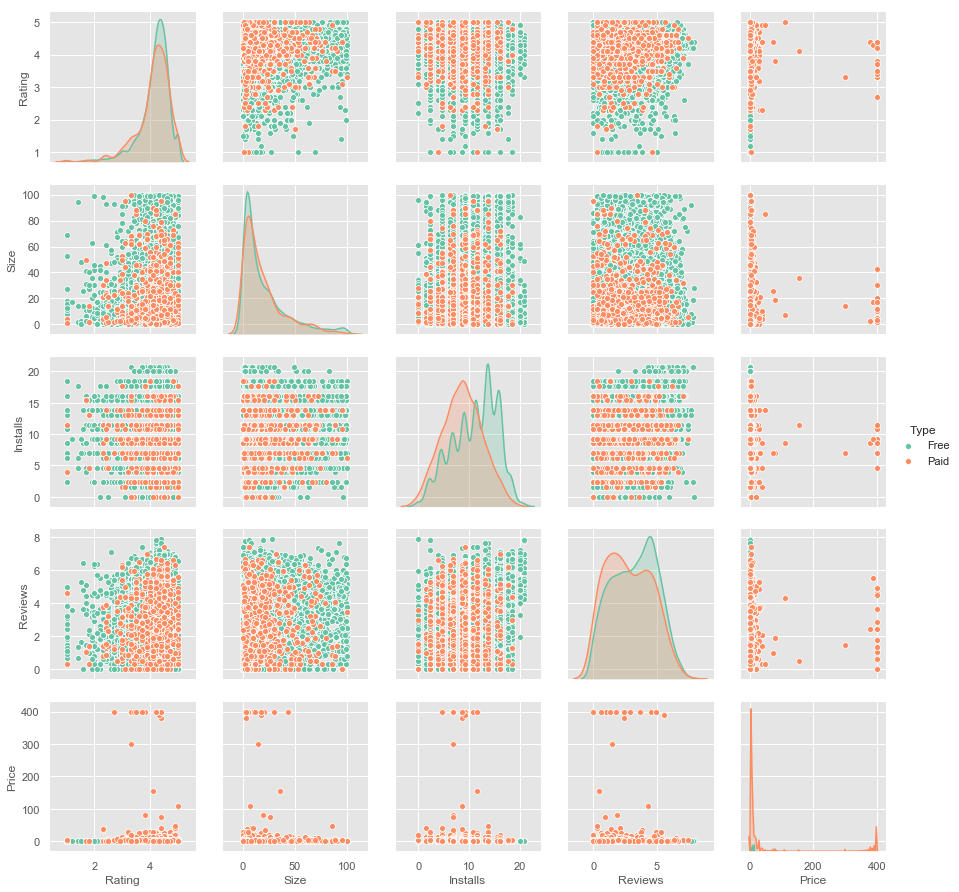

In [24]:
x = gd['Rating'].dropna()
y = gd['Size'].dropna()
z = gd['Installs'][gd.Installs!=0].dropna()
p = gd['Reviews'][gd.Reviews!=0].dropna()
t = gd['Type'].dropna()
price = gd['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)), columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']), hue='Type', palette="Set2")

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

## More analysis
Then, I want to know the ratio of different categories. 

([<matplotlib.patches.Wedge at 0x11f1dedd8>,
 [Text(1.0998365672504447, 0.018961153413183076, 'BEAUTY'),
  Text(1.0984733916220633, 0.057932787765835984, 'COMICS'),
  Text(1.0955064272412511, 0.09932606844685547, 'PARENTING'),
  Text(1.0906107391607496, 0.14341623209122387, 'EVENTS'),
  Text(1.08369675236085, 0.18868319724487043, 'ART_AND_DESIGN'),
  Text(1.0741392004550119, 0.23711806773392047, 'HOUSE_AND_HOME'),
  Text(1.0610145760317489, 0.2902551798817182, 'WEATHER'),
  Text(1.0441429385328258, 0.34607155894704184, 'LIBRARIES_AND_DEMO'),
  Text(1.0235529050604362, 0.4029137011102277, 'AUTO_AND_VEHICLES'),
  Text(0.9971694457764505, 0.46438464273690916, 'ENTERTAINMENT'),
  Text(0.9624582166696858, 0.5326107219771382, 'FOOD_AND_DRINK'),
  Text(0.9197640776441195, 0.6033523360984544, 'EDUCATION'),
  Text(0.8677190453831755, 0.6760648328964545, 'MAPS_AND_NAVIGATION'),
  Text(0.7992056418596969, 0.7558242798558604, 'VIDEO_PLAYERS'),
  Text(0.7125479505971731, 0.8380187456732509, 'DATING

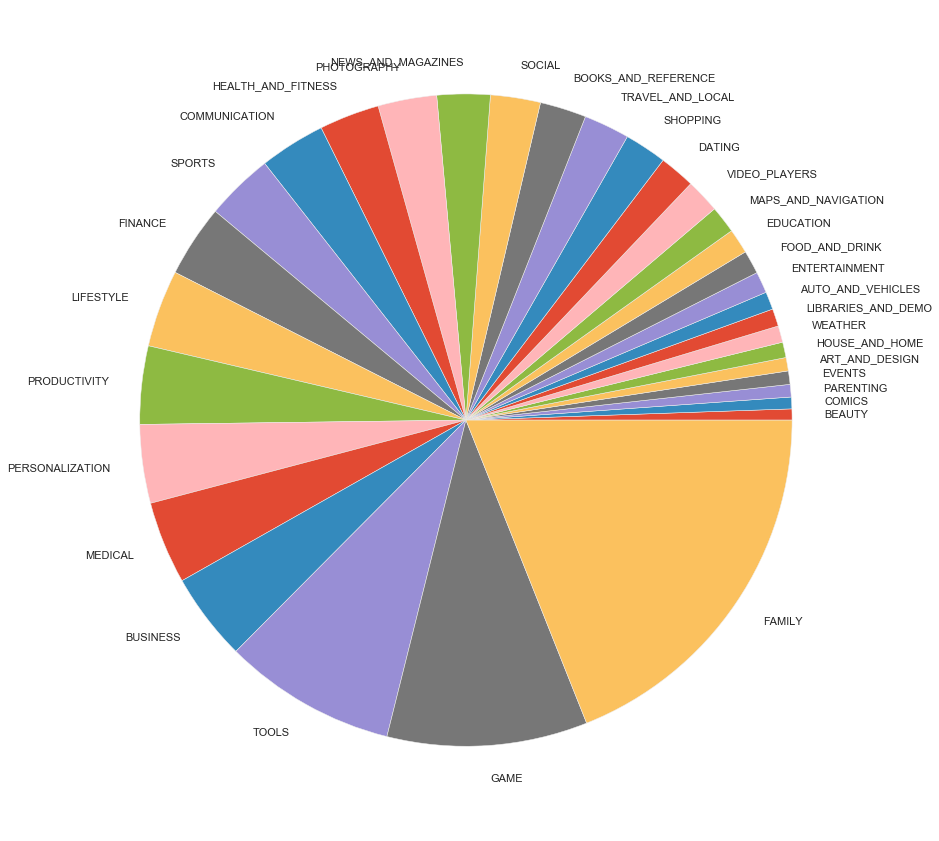

In [25]:
number_of_apps_in_category = gd['Category'].value_counts().sort_values(ascending=True)

plt.pie(x = number_of_apps_in_category.values,
        labels = number_of_apps_in_category.index,
        )


From the pie chart above, I know Family is the biggest category followed by Game and Tools. 
Then, I want to know what the general rating situation is

In [26]:
gd['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

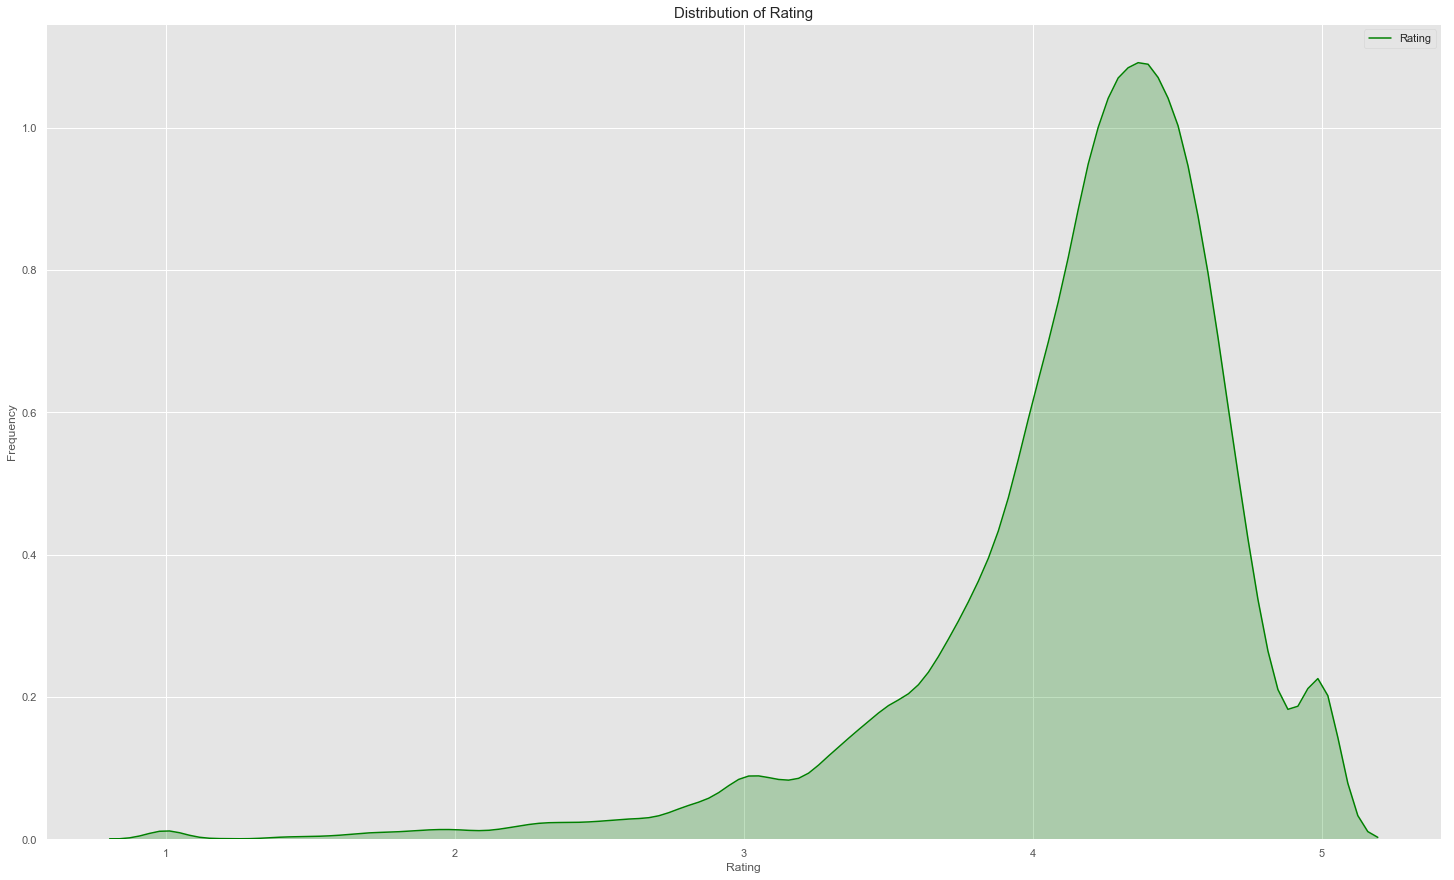

In [27]:
g = sns.kdeplot(gd.Rating, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 15)

Distribute them into different categories

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

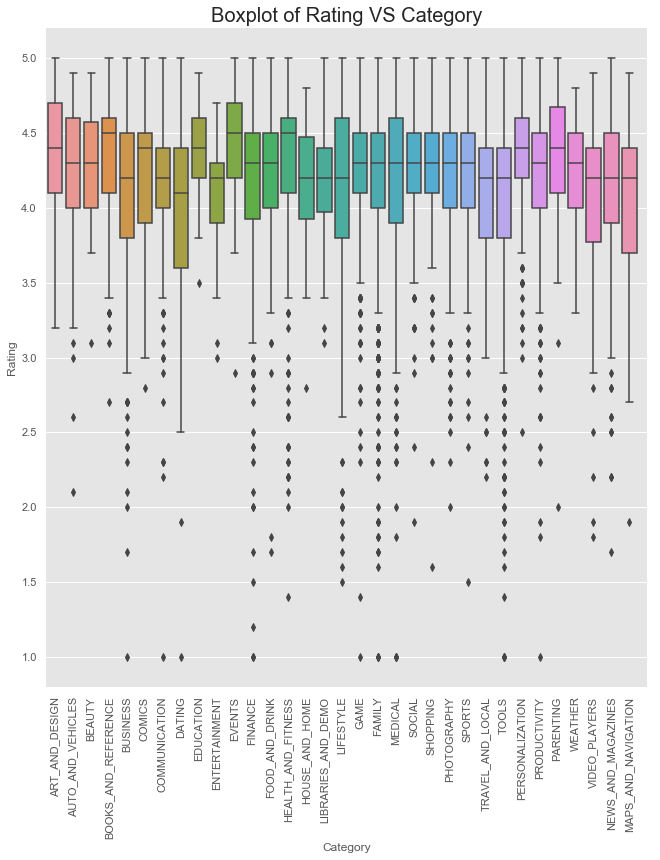

In [28]:
g = sns.catplot(x="Category",y="Rating",data=gd, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Then, I want to know the correlation between size and the rating

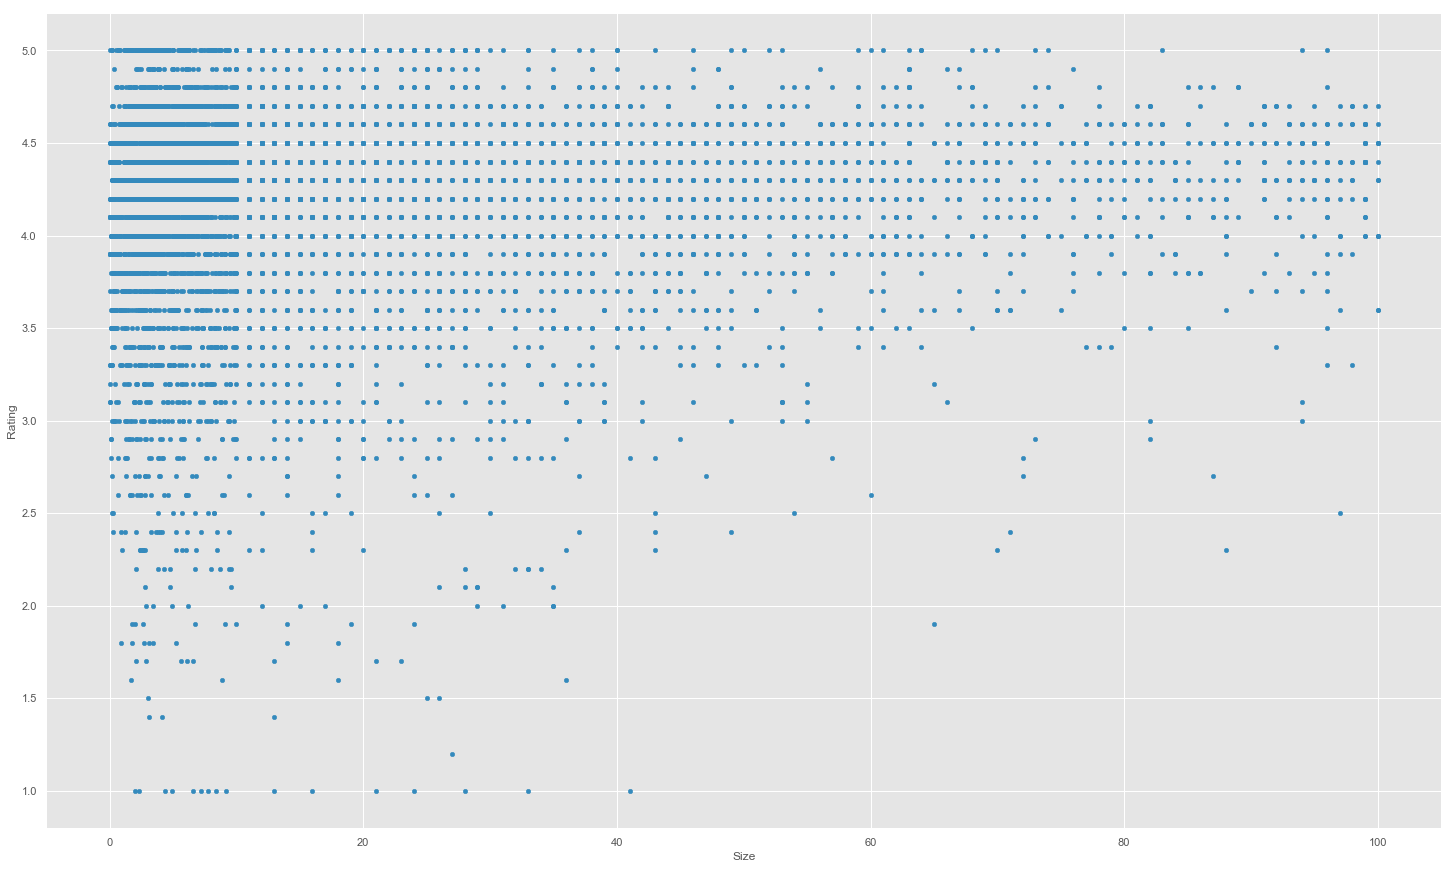

In [29]:
gd.plot.scatter('Size', 'Rating')

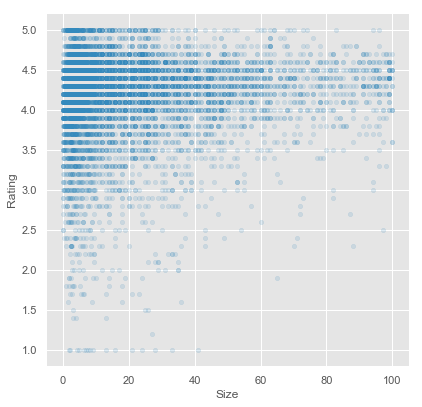

In [30]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
gd.plot.scatter('Size', 'Rating', alpha=0.15,ax=ax)